## Housing Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette('muted')
from scipy.stats import norm
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import math

Download the data: https://www.kaggle.com/c/5407/download/test.csv
View data description: https://www.kaggle.com/c/5407/download/data_description.txt

In [2]:
df = pd.read_csv('housing_kaggle_train.csv')
pd.set_option('display.max_columns', 90)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
df.shape

(1460, 81)

In [5]:
list(df.select_dtypes(include=['object']).columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

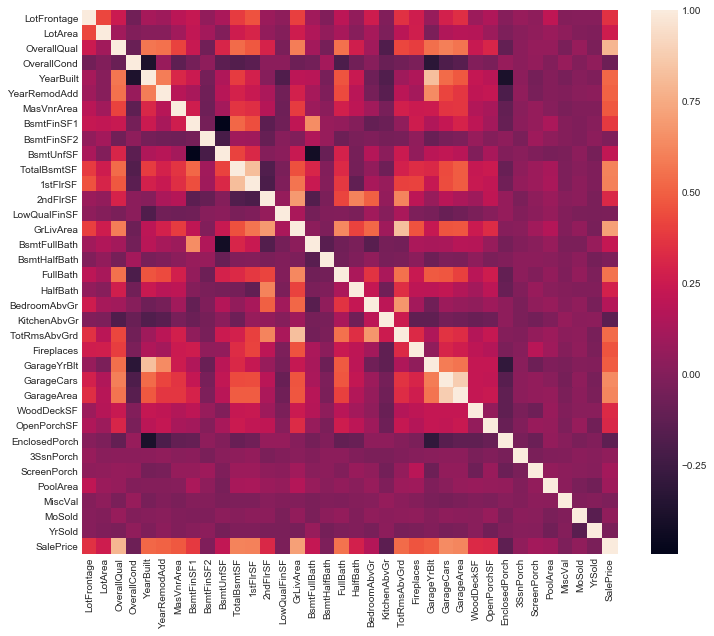

In [6]:
plt.subplots(figsize=(12,10)) 
sns.heatmap(df.drop(['Id', 'MSSubClass'], axis=1).corr())
plt.show()

In [7]:
#Correlation to sale price
print(df.corr().loc[:,'SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

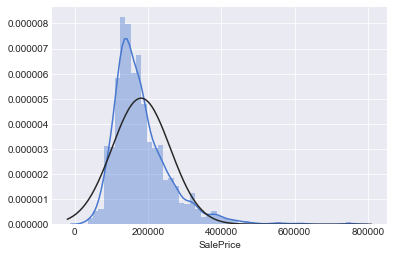

In [8]:
sns.distplot(df['SalePrice'], fit=norm)

plt.show()

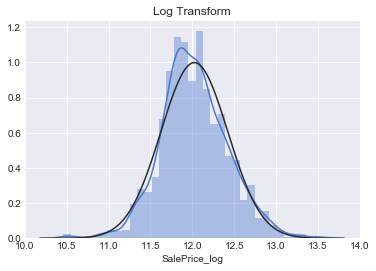

In [9]:
df['SalePrice_log'] = np.log(df['SalePrice'])

plt.title('Log Transform')
sns.distplot(df['SalePrice_log'], fit=norm)
plt.show()

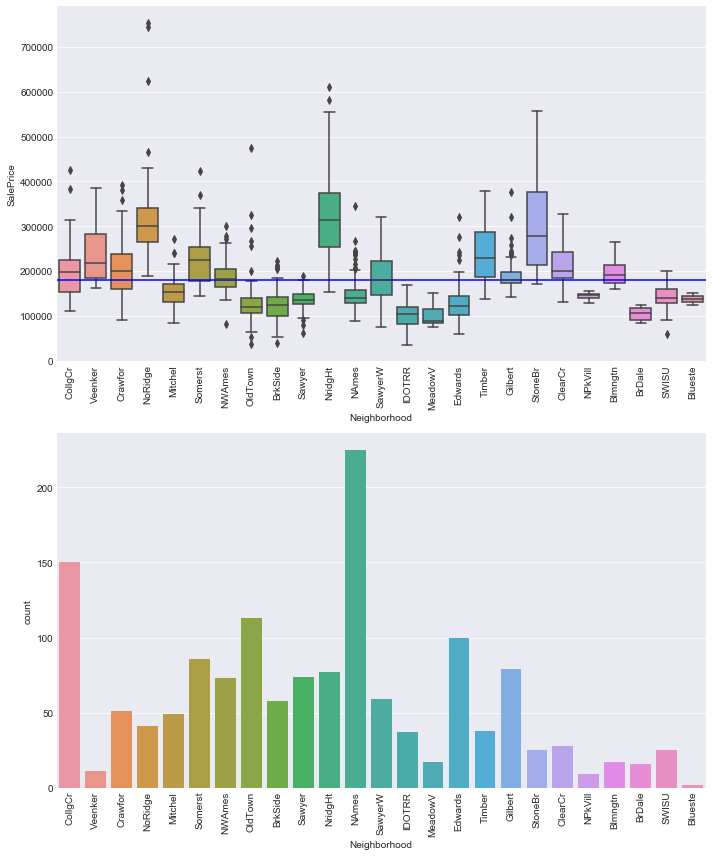

In [10]:

plt.figure(figsize=(10,12))
plt.subplot(2, 1, 1)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
plt.xticks(rotation=90)
plt.subplot(2, 1, 2)
sns.countplot(x='Neighborhood', data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

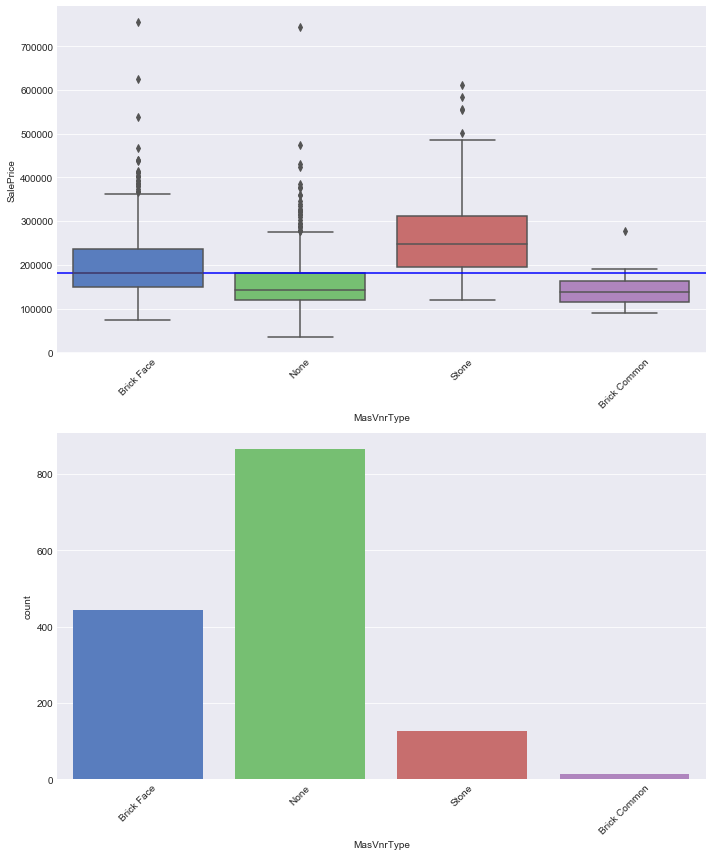

In [11]:
labels_n = ['Brick Face', 'None', 'Stone', 'Brick Common']

plt.figure(figsize=(10,12))
plt.subplot(2, 1, 1)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks(locs, labels_n, rotation=45)

plt.subplot(2, 1, 2)
sns.countplot(x='MasVnrType', data=df)
locs, labels = plt.xticks()
plt.xticks(locs, labels_n, rotation=45)
plt.tight_layout()
plt.show()

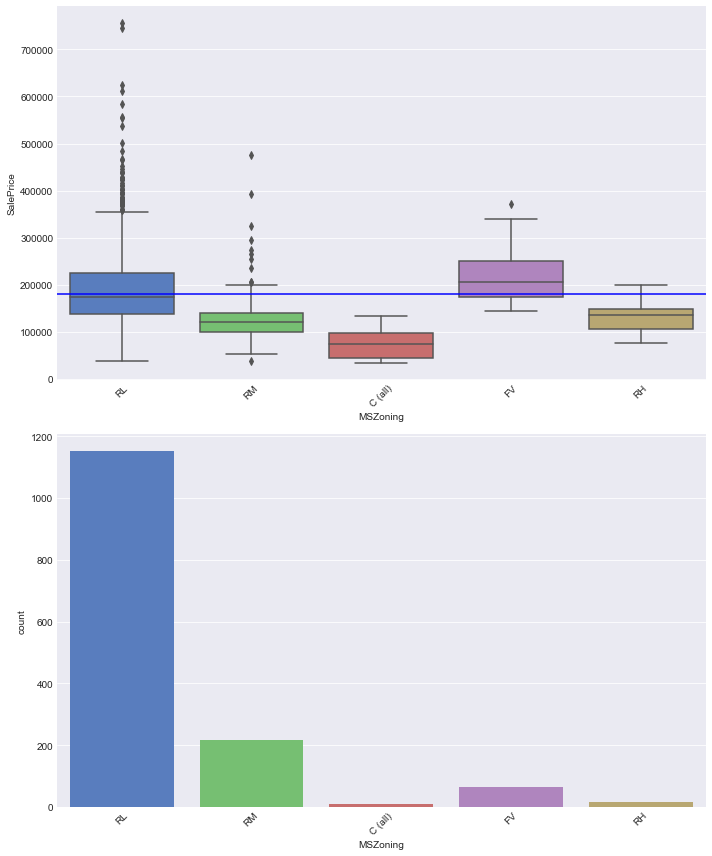

In [12]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.countplot(x='MSZoning', data=df)
locs, labels = plt.xticks()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

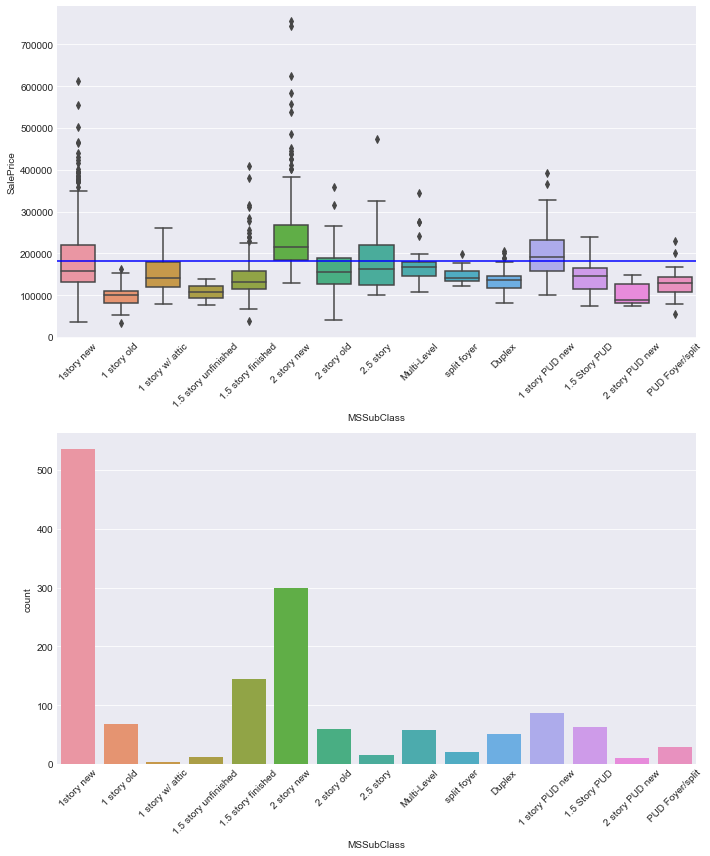

In [13]:
labels_n = ['1story new', '1 story old', '1 story w/ attic' ,
          '1.5 story unfinished', '1.5 story finished', '2 story new',
          '2 story old', '2.5 story', 'Multi-Level', 'split foyer',
          'Duplex', '1 story PUD new',
          '1.5 Story PUD', '2 story PUD new', 'PUD Foyer/split',
          '2 Family conversion']


fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks(locs, labels_n, rotation=45)

plt.subplot(2, 1, 2)
sns.countplot(x='MSSubClass', data=df)
locs, labels = plt.xticks()
plt.xticks(locs, labels_n, rotation=45)
plt.tight_layout()
plt.show()

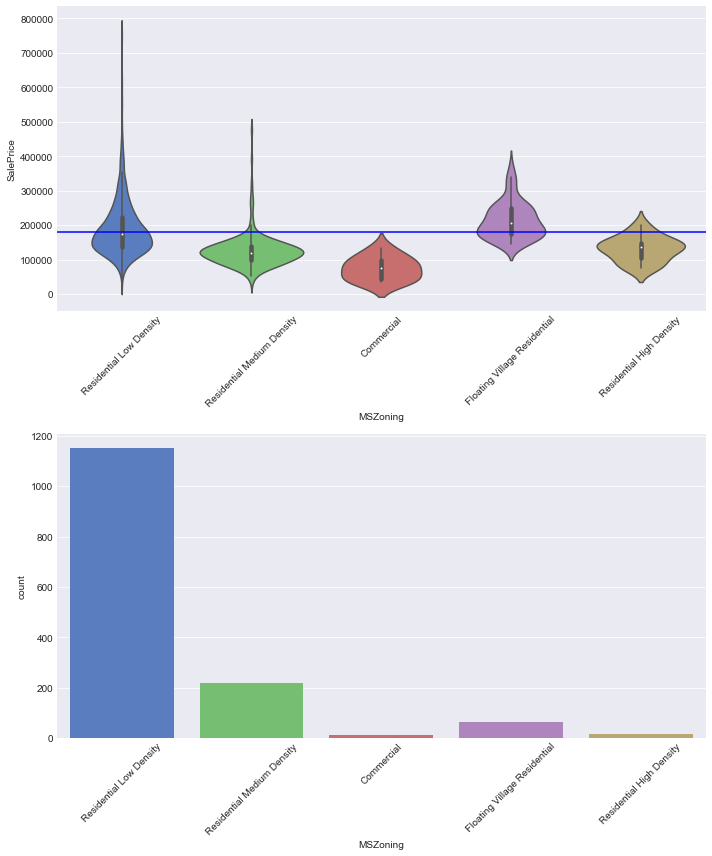

In [14]:
labels_n = ['Residential Low Density', 'Residential Medium Density', 'Commercial', 'Floating Village Residential', 'Residential High Density']

plt.figure(figsize=(10,12))
plt.subplot(2, 1, 1)
sns.violinplot(x = 'MSZoning', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks(locs, labels_n, rotation=45)

plt.subplot(2, 1, 2)
sns.countplot(x='MSZoning', data=df)
plt.xticks(locs, labels_n, rotation=45)
plt.tight_layout()
plt.show()

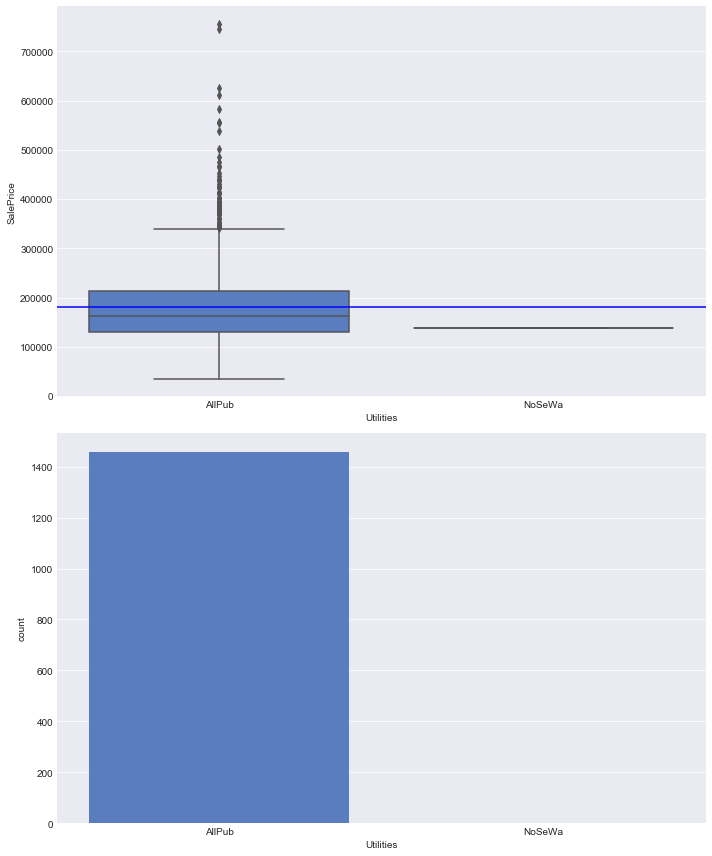

In [15]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.boxplot(x = 'Utilities', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='Utilities', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

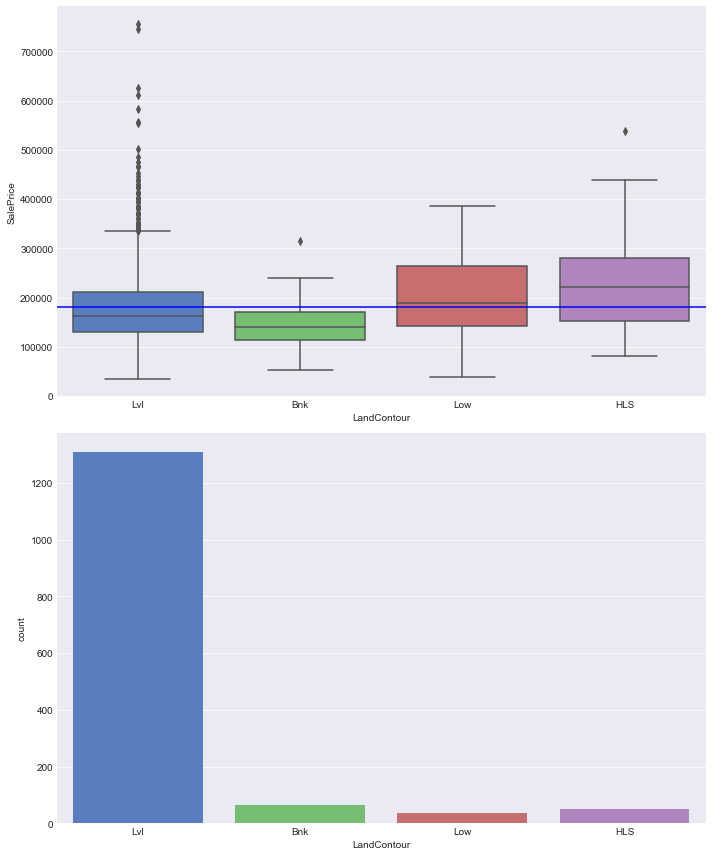

In [16]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.boxplot(x = 'LandContour', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='LandContour', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

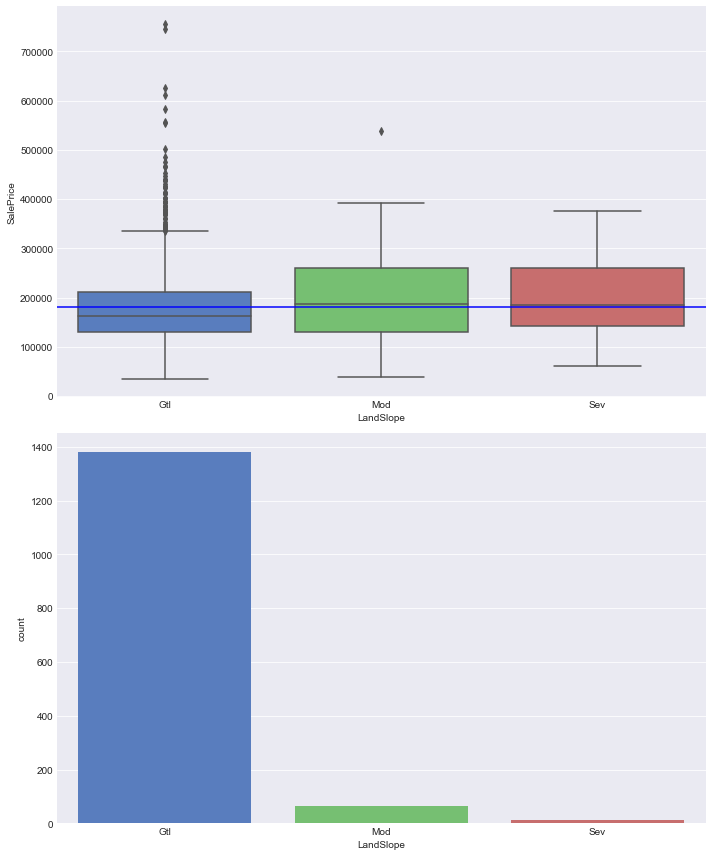

In [17]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.boxplot(x='LandSlope', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='LandSlope', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

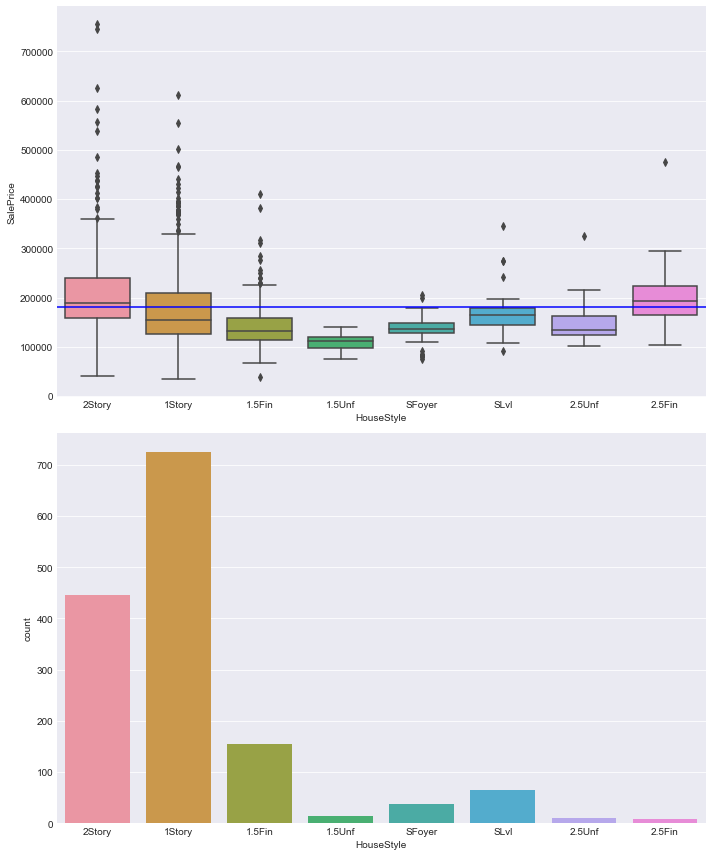

In [18]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.boxplot(x='HouseStyle', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='HouseStyle', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

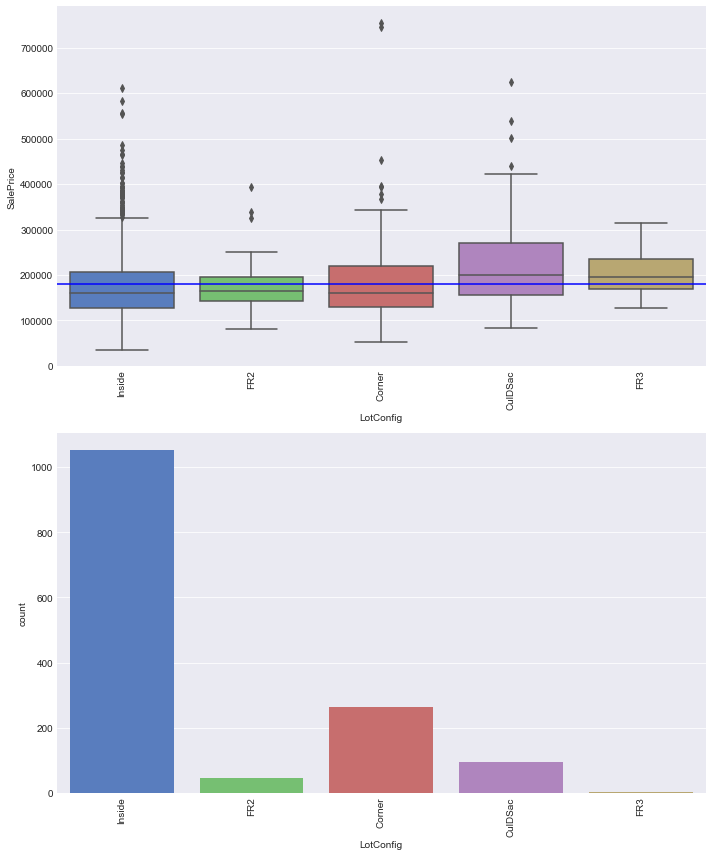

In [19]:
plt.figure(figsize=(10,12))
plt.subplot(2, 1, 1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
plt.xticks(rotation=90)
plt.subplot(2, 1, 2)
sns.countplot(x='LotConfig', data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

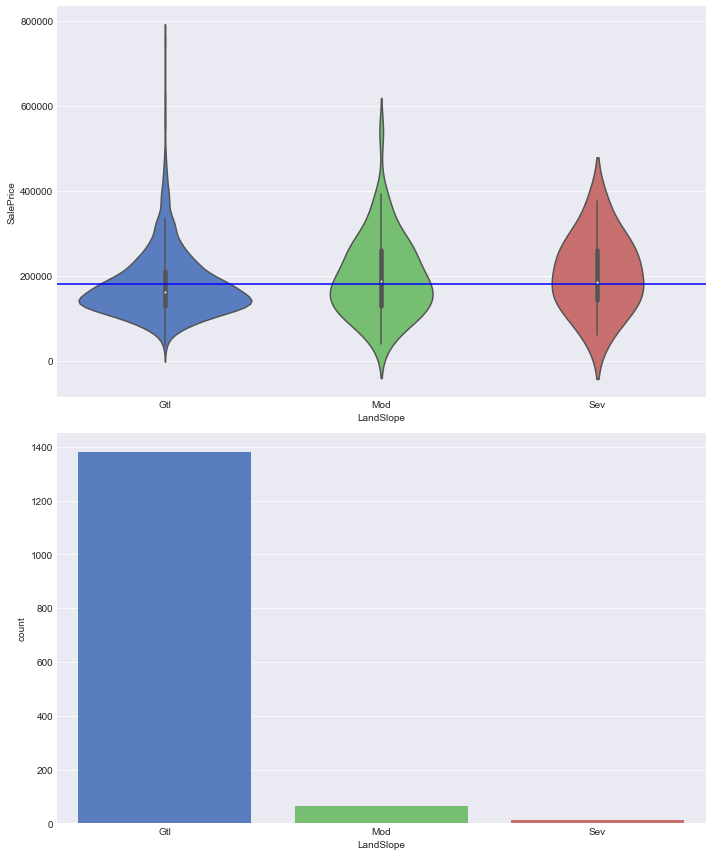

In [20]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.violinplot(x = 'LandSlope', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='LandSlope', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

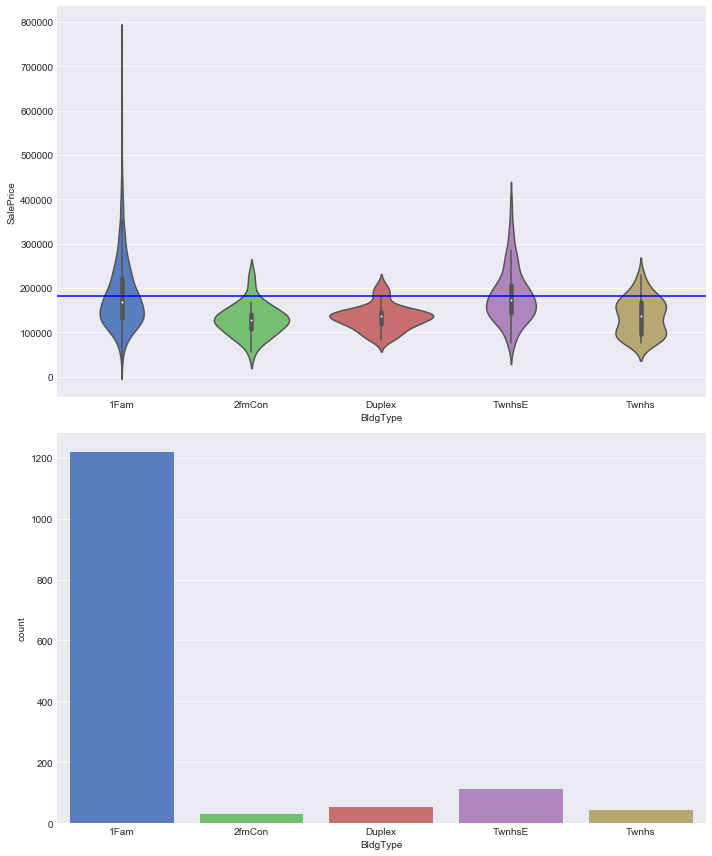

In [21]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.violinplot(x = 'BldgType', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='BldgType', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

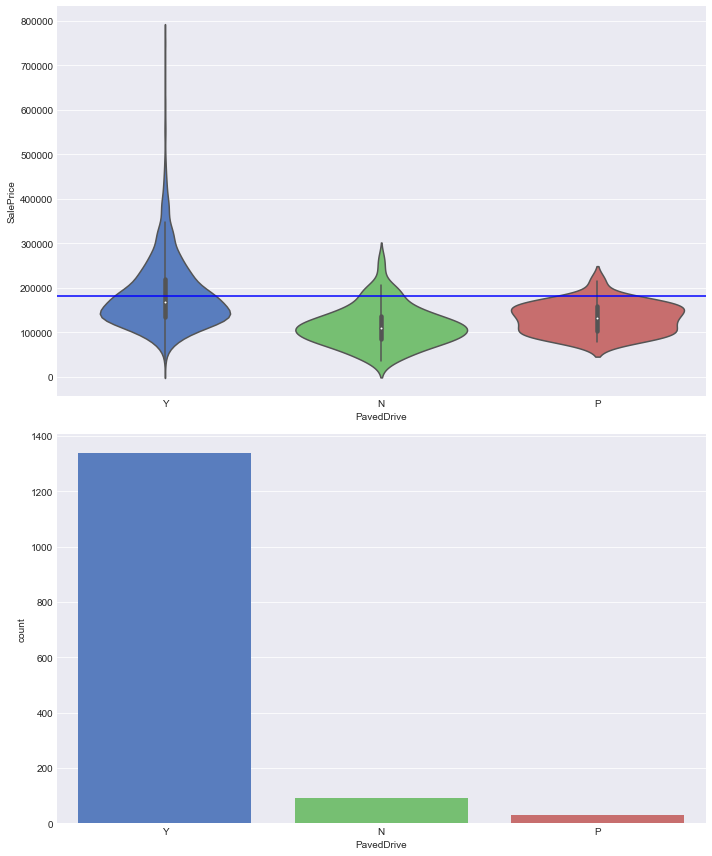

In [22]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.violinplot(x = 'PavedDrive', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='PavedDrive', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

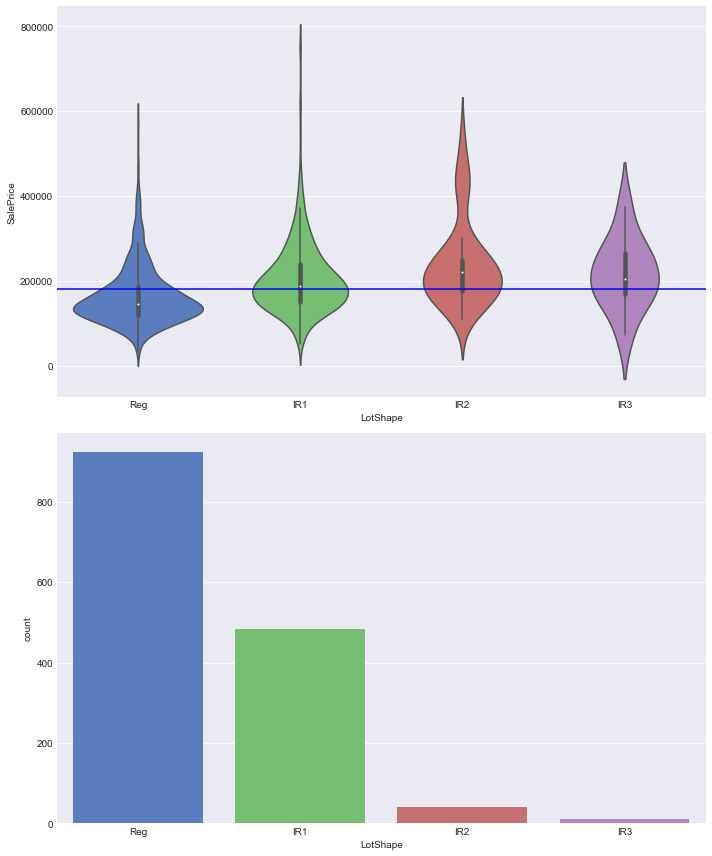

In [23]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.violinplot(x = 'LotShape', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='LotShape', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

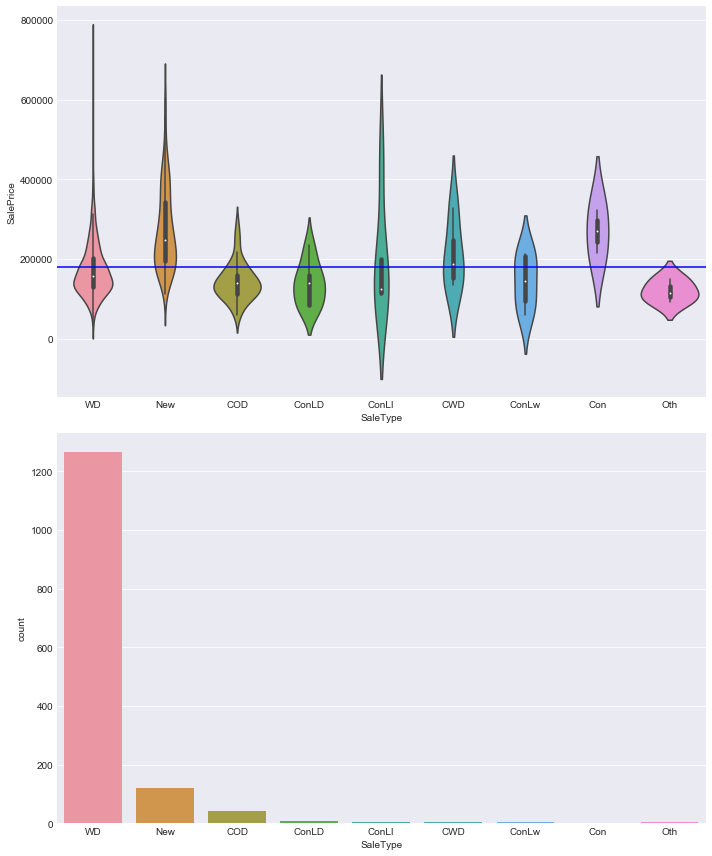

In [24]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.violinplot(x = 'SaleType', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='SaleType', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

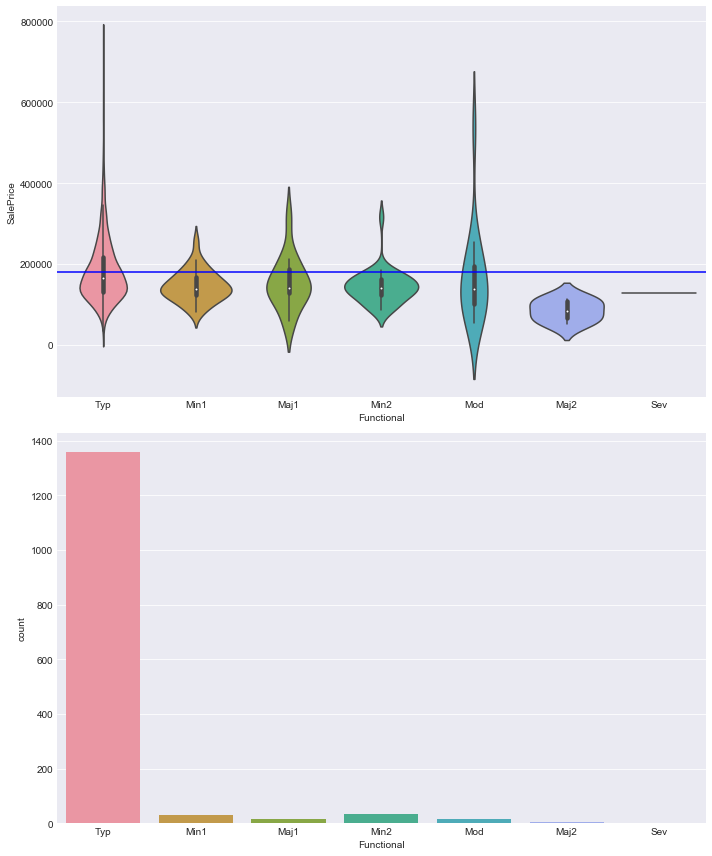

In [25]:
fig, ax = plt.subplots(figsize=(10,12))

plt.subplot(2, 1, 1)
sns.violinplot(x = 'Functional', y = 'SalePrice',  data = df)
plt.axhline(y=df.SalePrice.mean(), c='b')
locs, labels = plt.xticks()
plt.xticks()

plt.subplot(2, 1, 2)
sns.countplot(x='Functional', data=df)
locs, labels = plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show()

In [26]:
print(df.corr().loc[:,'SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
SalePrice_lo

In [27]:
#Drop outliers
df = df.drop([523, 1298])

#Mason Type MasVnrType
dummies = pd.get_dummies(df.MasVnrType)
df = pd.concat([df, dummies], axis=1)
Mason = list(dummies.columns)

#LotConfig
df['LotConfig_b'] =df['LotConfig'].replace({'FR2': 'MFR', 'FR3': 'MFR'})
dummies = pd.get_dummies(df.LotConfig_b)
df = pd.concat([df, dummies], axis=1)
LotConfig = list(dummies.columns)

#MS sub class
df['MSZoning_b'] = df['MSZoning'].replace({'A':4, 'C (all)':1, 'FV':3, 'I':4, 'RH':1, 'RL':2, 'RP':2, 'RM':1})

dummies = pd.get_dummies(df.MSZoning_b)
df = pd.concat([df, dummies], axis=1)
MSzone = list(dummies.columns)

#Alley
df['Alley'].fillna('None', inplace=True)
df['Alley_b'] = df['Alley'].replace({'P': 'A_Paved', 'Grvl': 'A_Grvl', 'None': 'A_None'})

dummies = pd.get_dummies(df.Alley_b)
df = pd.concat([df, dummies], axis=1)
Alley = list(dummies.columns)

#Street
dummies = pd.get_dummies(df.Street)
df = pd.concat([df, dummies], axis=1)
Street = list(dummies.columns)

#PavedDrive
dummies = pd.get_dummies(df.PavedDrive)
df = pd.concat([df, dummies], axis=1)
PavedD = list(dummies.columns)

#LotShape
df['LotShape_b'] = df['LotShape'].replace({'IR3': 'IR2'})
dummies = pd.get_dummies(df.LotShape_b)
df = pd.concat([df, dummies], axis=1)
LotShape = list(dummies.columns)

#BldgType
dummies = pd.get_dummies(df.BldgType)
df = pd.concat([df, dummies], axis=1)
Btype = list(dummies.columns)

#House Style 
df['HouseStyle_b'] = df.HouseStyle.replace({'2Story': '2_story', '1Story': '1_story', '1.5Fin': '1.5_story', '1.5Unf': '1.5_story',
                                            'SFoyer': 'SplitF', 'SLvl': 'SplitF', '2.5Unf':'2_story','2.5Fin':'2_story'})
dummies = pd.get_dummies(df.HouseStyle_b)
df = pd.concat([df, dummies], axis=1)
Hstyle = list(dummies.columns)


#LandContour
df['has_bank'] = np.where(df['LandContour']== 'Bnk', 1, 0)

#Land Slope
df['has_slope'] = np.where(((df['LandSlope'] == 'Mod') | (df['LandSlope'] == 'Sev')), 1, 0)

#Engineering adding some variables together
df['12SF'] = df['1stFlrSF'] + df['2ndFlrSF']

#All bath
df['AllBath'] = df['FullBath'] + (df['HalfBath']) + df['BsmtFullBath'] + (df['BsmtHalfBath'])

#All square feet
df['1SF+2SF+GSF+BSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['TotalBsmtSF']

#Has second story
df['has_1_story'] = np.where(df['2ndFlrSF'] == 0, 1, 0)

#Has pool
df['has_pool'] = np.where(df['PoolArea'] == 0, 0, 1)

#Has basement
df['has_basement'] = np.where(df['TotalBsmtSF'] == 0, 0, 1)

#Has garage
df['has_garage'] = np.where(df['GarageArea'] == 0, 0, 1)

#Porch SF combined
df['PorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

#Has porch
df['has_porch'] = np.where(df['PorchSF'] == 0, 0, 1)

#Has fence
df['has_fence'] = np.where(pd.isnull(df['Fence']), 0, 1)

#New sale
df['is_new'] = np.where(df.SaleType == 'New', 1, 0)

#is functional
df['is_func'] = np.where(df.Functional != 'Typ', 0, 1)


#Get dummies for Neighborhood
dummies = pd.get_dummies(df.Neighborhood)
df = pd.concat([df, dummies], axis=1)
Neighborhoods = list(dummies.columns)

#Fill in missing values in lot frontage with mean by neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


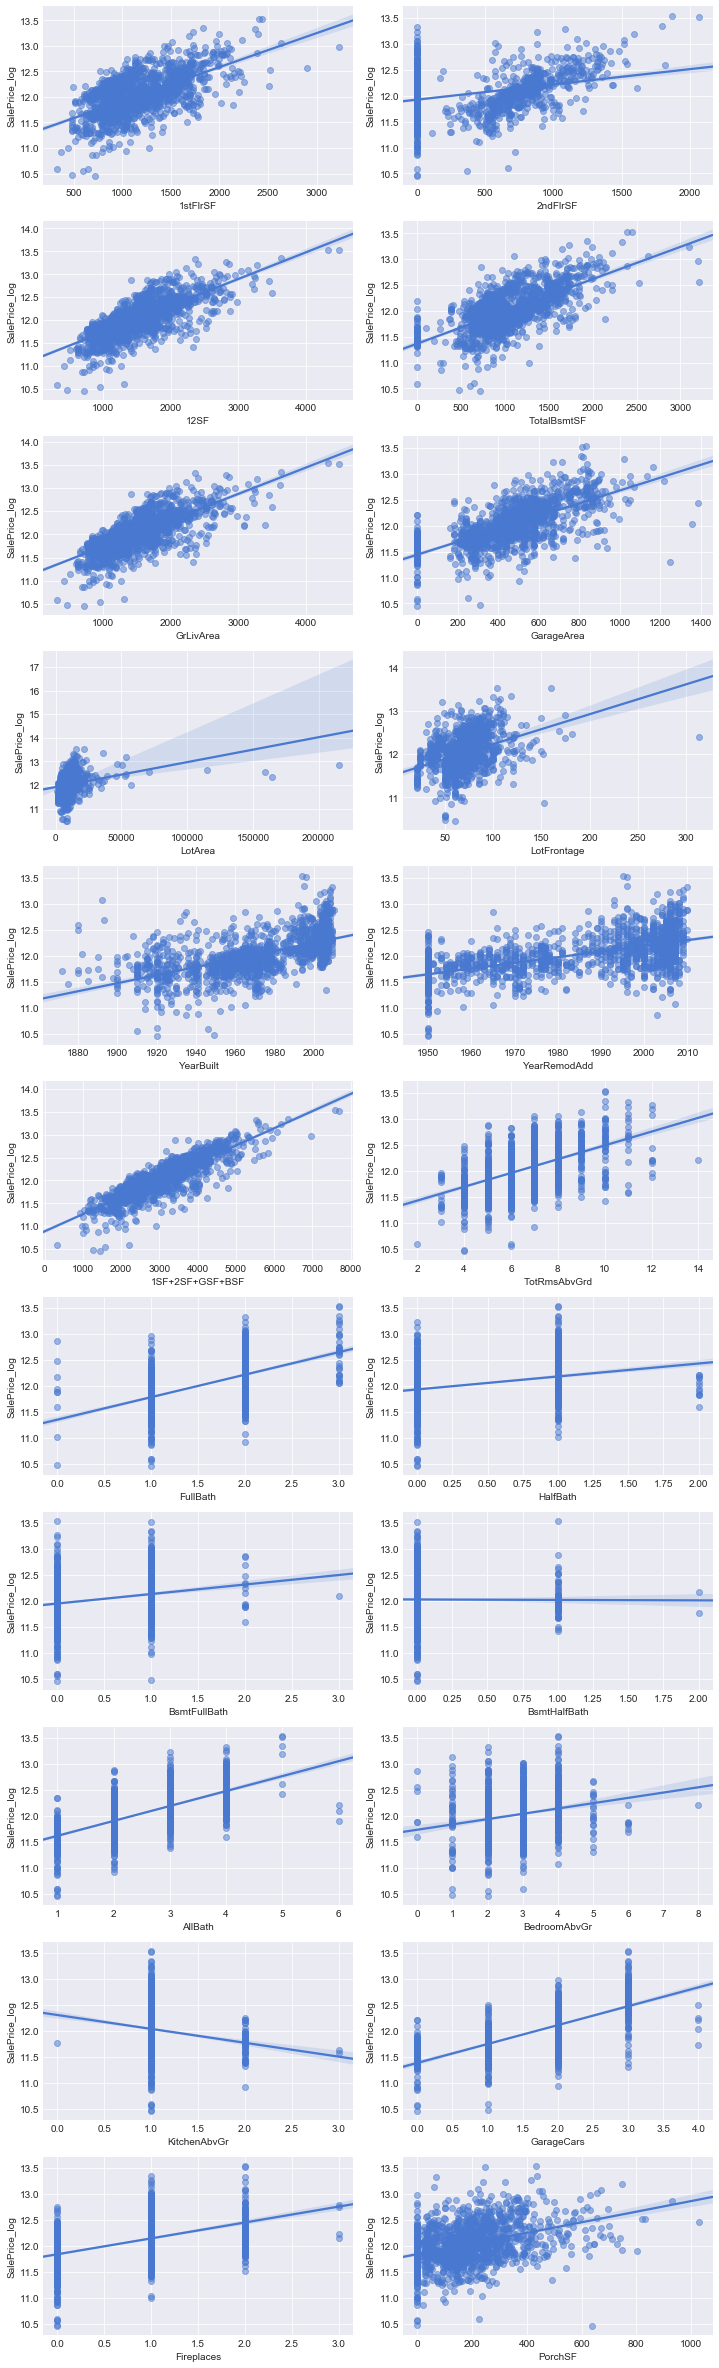

In [28]:

#Looking at variables with high correlation plus some interesting ones.
#set variables to plot
plot_vars = ['1stFlrSF', '2ndFlrSF', '12SF', 'TotalBsmtSF', 'GrLivArea', 
             'GarageArea', 'LotArea', 'LotFrontage', 'YearBuilt', 'YearRemodAdd', '1SF+2SF+GSF+BSF', 'TotRmsAbvGrd',
             'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'AllBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'Fireplaces', 'PorchSF'
            ]

#decide how many rows in our subplot
rownum = np.ceil(len(plot_vars) / 2)

plt.figure(figsize=(10, rownum*3))
for x in plot_vars:
    plotnum = plot_vars.index(x) + 1
    plt.subplot(rownum, 2, plotnum)
    sns.regplot(x=x, y='SalePrice_log', data=df, scatter_kws={'alpha':0.5})
    
plt.tight_layout()

## OLS

In [29]:
contin = ['OverallQual', '12SF', 'PoolArea', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'YearBuilt', 
              'YearRemodAdd', 'PorchSF', 'LotFrontage', 'Fireplaces',
              'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

#Standardizing continuous variables
scaler = StandardScaler()

In [48]:
#Set X and Y
X = df.loc[:,['has_pool', 'has_basement', 'has_garage', 'has_porch', 'is_new', 'is_func']
           + contin + Neighborhoods + MSzone + LotConfig + Mason + Btype + Hstyle]

y = df.loc[:,'SalePrice_log']

scaler.fit(X)
X = scaler.transform(X)
#Split data into train and test
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=df.Neighborhood, random_state=1337)

#Set up model
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print(cross_val_score(lr, X_train, y_train, cv=2).mean())
cross_val_score(lr, X_train, y_train, cv=2)

-4.27835212232e+20


array([  8.90428579e-01,  -8.55670424e+20])

In [49]:
lr.score(X_test, y_test)

0.9161033365081831

In [50]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

0.11712843134557953

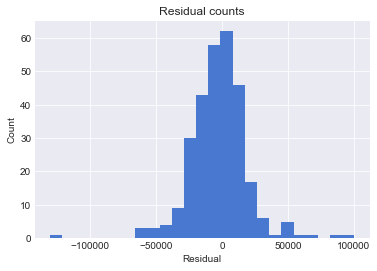

In [51]:
actual = np.exp(y_test)
predicted = np.exp(lr.predict(X_test))

#actual = y_test
#predicted = lr.predict(X_test)
#Calculate the residual/error.
residual = actual - predicted

plt.hist(residual, bins=25)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

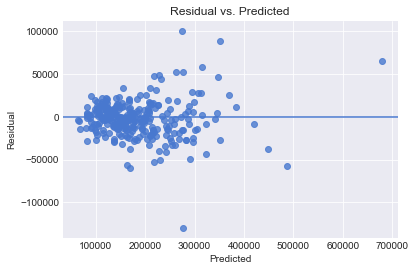

In [52]:
sns.regplot(predicted, residual,fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [35]:
residual.describe()

count       292.000000
mean      -2170.521283
std       21958.968815
min     -130449.445252
25%      -14031.250521
50%       -1869.569948
75%        8997.498391
max      100473.720585
Name: SalePrice_log, dtype: float64

## LASSO

In [36]:
lass = linear_model.Lasso(alpha=.002, max_iter=8000)
lass.fit(X_train, y_train)
cross_val_score(lass, X, y).mean()

0.8959792515694186

C:\Users\Will\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Will\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Will\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


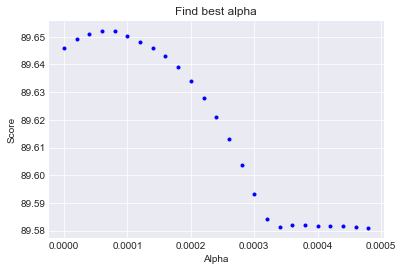

In [37]:
alphas = np.arange(1e-20, .0005, 0.00002)
plt.figure()
plt.ticklabel_format(useOffset=False)
plt.ylim()
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Find best alpha')
for alpha in alphas:
    lass.set_params(**{'alpha':alpha, 'max_iter':8000})
    score = cross_val_score(lass, X, y).mean()
    plt.plot(alpha, score*100, '.', c='b')

In [38]:
np.sqrt(mean_squared_error(y_test, lass.predict(X_test)))

0.11860649971376723

## Ridge

In [39]:
ridge = linear_model.Ridge(alpha=5) 
ridge.fit(X_train, y_train)
cross_val_score(ridge, X_train, y_train)

array([ 0.90392677,  0.8704759 ,  0.89218766])

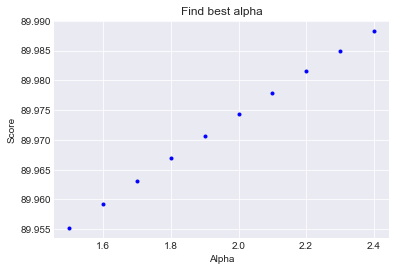

In [40]:
alphas = np.arange(1.5, 2.5, 0.1)
plt.figure()
plt.ticklabel_format(useOffset=False)
plt.ylim()
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Find best alpha')
for alpha in alphas:
    ridge.set_params(**{'alpha':alpha})
    score = cross_val_score(ridge, X_test, y_test, cv=5).mean()
    plt.plot(alpha, score*100, '.', c='b')

In [41]:
ridge.set_params(**{'alpha': 0.21})
print(cross_val_score(ridge, X_test, y_test, cv=5).mean())
cross_val_score(ridge, X_test, y_test, cv=3)

0.898882912407


array([ 0.89788987,  0.87873665,  0.9231733 ])

In [42]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

0.11703896531111503

## Boosted OLS trees

In [43]:
clf = GradientBoostingRegressor(learning_rate=.02, n_estimators=1000, max_depth=4)
clf.fit(X_train, y_train)
print(cross_val_score(clf, X_train, y_train).mean())
cross_val_score(clf, X_train, y_train)

0.870067735724


array([ 0.88239922,  0.84582365,  0.88046778])

In [44]:
pd.set_option('display.max_columns', 120)
df['weird'] = df['12SF'] - df['GrLivArea']
df[(df.weird != 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,...,Pave,Grvl,Pave,N,P,Y,LotShape_b,IR1,IR2,Reg,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,HouseStyle_b,1.5_story,1_story,2_story,SplitF,has_bank,has_slope,12SF,AllBath,1SF+2SF+GSF+BSF,has_1_story,has_pool,has_basement,has_garage,PorchSF,has_porch,has_fence,is_new,is_func,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,weird
51,52,50,RM,52.0,6240,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,816,0,360,1176,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,...,0,0,1,0,0,1,Reg,0,0,1,1,0,0,0,0,1.5_story,1,0,0,0,0,0,816,1,2160,1,0,1,1,112,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-360
88,89,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,...,0,0,1,1,0,0,IR1,1,0,0,1,0,0,0,0,1.5_story,1,0,0,0,0,0,1013,1,2026,1,0,1,0,156,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-513
125,126,190,RM,60.0,6780,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,...,0,0,1,1,0,0,Reg,0,0,1,0,1,0,0,0,1.5_story,1,0,0,0,0,0,520,2,1040,1,0,1,0,53,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-234
170,171,50,RM,60.0,12358,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,360,Unf,0,360,720,GasA,TA,Y,SBrkr,854,0,528,1382,0,0,1,1,2,1,TA,7,Typ,0,NaN,Detchd,1991.0,...,0,0,1,0,0,1,IR1,1,0,0,1,0,0,0,0,1.5_story,1,0,0,0,0,0,854,2,2234,1,0,1,1,237,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-528
185,186,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,...,0,0,1,0,0,1,IR2,0,1,0,1,0,0,0,0,2_story,0,0,1,0,0,0,3036,3,4983,0,0,1,1,670,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-572
187,188,50,RL,60.0,10410,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,1916,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,660,660,GasA,Ex,Y,SBrkr,808,704,144,1656,0,0,2,1,3,1,TA,8,Min2,0,NaN,Detchd,1916.0,...,0,0,1,1,0,0,Reg,0,0,1,1,0,0,0,0,1.5_story,1,0,0,0,0,0,1512,3,2352,0,0,1,1,140,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-144
197,198,75,RL,174.0,25419,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,...,0,0,1,0,0,1,Reg,0,0,1,1,0,0,0,0,2_story,0,0,1,0,0,0,2720,4,4875,0,1,1,1,568,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-392
198,199,75,RM,92.0,5520,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm